# Paisa bazaar Banking Fraud Analysis



### Business Context

Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.

In this context, analyzing and classifying credit scores based on customer data can improve decision-making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split


# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('dataset-2.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(100000, 28)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
# Float columns/Number of float columns
float_columns = df.select_dtypes(["float64"]).columns

print("Columns: ",list(float_columns))
print(f"Number of columns in dtype ['float']: ",len(float_columns))

Columns:  ['Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
Number of columns in dtype ['float']:  18


In [7]:
# Object columns/Number of object columns
object_columns = df.select_dtypes(["object"]).columns

print("Columns: ",list(object_columns))
print(f"Number of columns in dtype ['object']: ",len(object_columns))

Columns:  ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
Number of columns in dtype ['object']:  7


In [8]:
# int64 columns/Number of int64 columns
int_columns = df.select_dtypes(["int64"]).columns

print("Columns: ",list(int_columns))
print("Number of columns in dtype ['int64']: ",len(int_columns))

Columns:  ['ID', 'Customer_ID', 'Month']
Number of columns in dtype ['int64']:  3


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

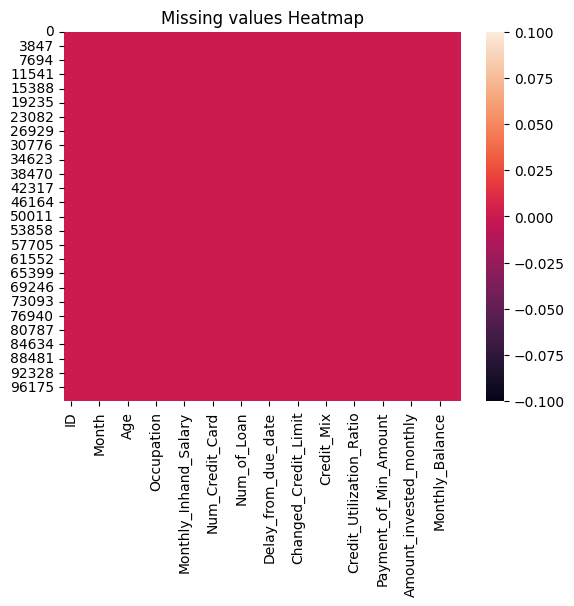

In [11]:
# Visualizing the missing values
sns.heatmap(df.isna())
plt.title("Missing values Heatmap")
plt.show()

### Insights

#### **1. Shape of the dataset**
* The dataset contains 10000 rows and 28 columns

#### **2. Datatype and Non-Null count**
* **Data Types:** There are 7 columns with `object` data type, 18 columns with `float64` data type and 3 columns with `int64` data type.
    - **Numerical feature:** These include features like `'Age'`, `'SSN'`, `'Annual_Income'`, `'Monthly_Inhand_Salary'`, `'Num_Bank_Accounts'` etc...
    - **Categorical feature:** These include features like `'Name'`, `'Occupation'`, `'Type_of_Loan'`, `'Credit_Mix'` etc... are categorical

#### **3. Duplicate values Analysis:**

* The dataset has no duplicate values

#### **4. Missing values Analysis:**

* The dataset has no missing values



### Statistical Analysis

In [12]:
# Dataset Describe (Numerical variables)
df.describe(percentiles=[0.01,0.25,0.75,0.99])

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
1%,7133.950000,1528.890000,1.000000,14.000000,1.029607e+07,7534.161700,531.875417,0.000000,1.000000,1.00000,0.000000,0.00000,0.000000,0.680000,0.000000,27.625600,22.740859,17.000000,0.000000,0.000000,50.363436
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
99%,154129.050000,50476.040000,8.000000,55.000000,9.893100e+08,166891.761200,13822.370000,10.000000,10.000000,34.00000,9.000000,61.00000,25.000000,28.550000,15.000000,4806.966900,42.450965,396.000000,592.725398,192.404922,1054.665314
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [13]:
# Dataset Describe Object dtypes (categorical variables)
df.describe(include='O')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Stevex,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


In [14]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

## Insights

#### **5. Summary Statistical:**

* Numerical Features:

    **1. Customer Demographics**

    - `Age:` Age range from 14 to 56 years, showing a wide demographics spread

    **2.Income and Financial capacity**

    - `Annual Income` ranges from ~$7005 to ~ $179987 with the mean of ~ $50505, indicating a significant spread in Income of the persons

    **3. Creadit facility usage**

    - `Num_Bank_Accounts` ranges from 0 to 11 with a mean of 5, There are many people don't even have bank account and some of the peoples are having 11 bank accounts.

    - `Num_Credit_Card` Average 5 credit cards per customer and There are peoples who has high credit usage of 11 credit cards

    - `Interest_Rate` has a wide range varies from 1 to 34 with a mean of ~5

    - `Num_of_Loan` max of 9 loans which indicates high borrowing

    **4. Payment Behaviour**

    - `Delay_from_due_date` Average of ~21 days and maximum delay of 62 days. This indicating some serious payment behaviour issues for some customers

* Categorical Features:

    **1. Customer Occupation**

    - `Occupation` Top customer occupation on the dataset is `Lawyer`

    **2. Type_of_Loan**

    - `Type of Loan` columns has 6261 unique classes. It need to be addressed while preprocessing

    **2. Target valriable (Credit Score)**

    - `Credit_Score` has three unique score classified as `'Good', 'Standard', 'Poor'`
    - Maximum customers have credit score as `Standard`



### Issues to be Addressed Later

1. Categorical Encoding:

    - Categorical features like `'Occupation'`, `'Type_of_Loan'`, `'Credit_Mix'` etc... 

2. Outlier Detection and Handing:

    - Features like `Annual Income`,`Total_EMI_per_month`, `Monthly_Inhand_Salary`, `Credit_Utilization_Ratio`, `Amount_invested_monthly` etc.. has to be detected.

3. Correlation and Multicollinearity:

    - Initial correalation suggest that some feature might be highly correlated with each other. Which need to be addressed during feature seelction.

In [15]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

### Data Vizualization

##### Univariante Analysis

In [16]:
def univariant_plot(data, column):
    
    plt.figure(figsize=(7,5))
    sns.histplot(data=data, x=df[column] ,bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

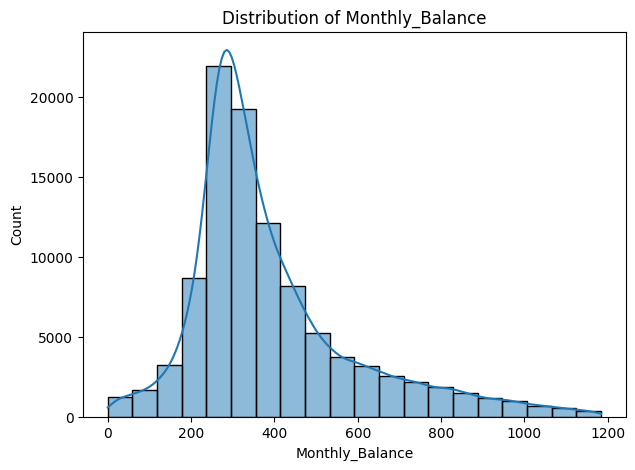

In [17]:
univariant_plot(df, "Monthly_Balance")

In [18]:
print(list(df.columns))

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


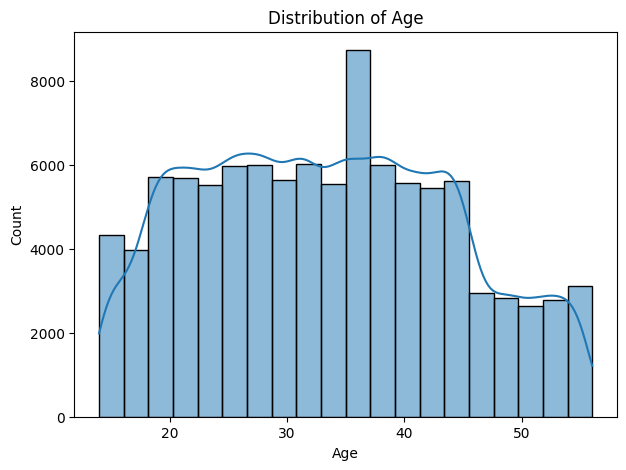

In [19]:
univariant_plot(df, "Age")

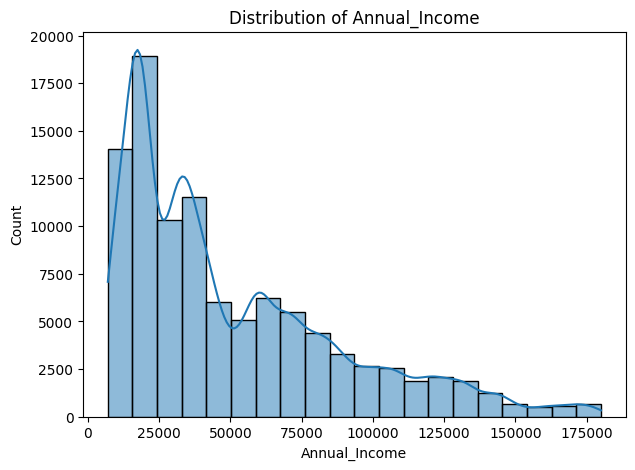

In [20]:
univariant_plot(df, "Annual_Income")

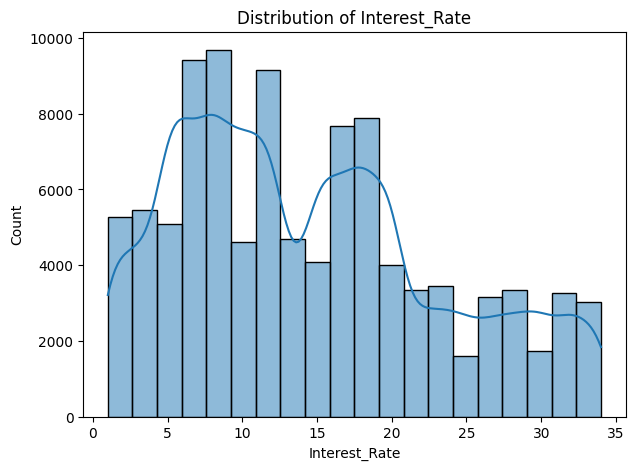

In [21]:
univariant_plot(df, "Interest_Rate")

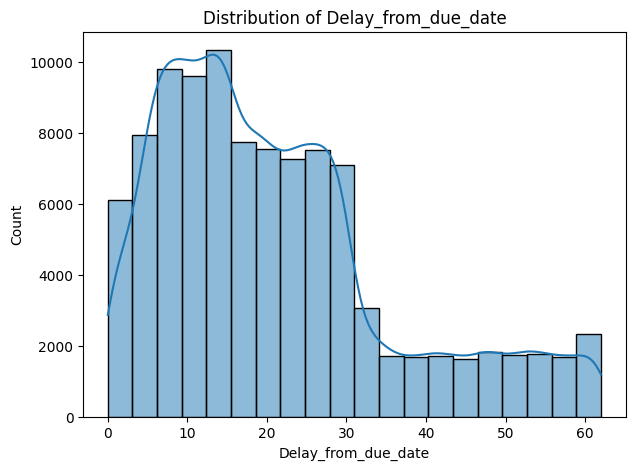

In [22]:
univariant_plot(df, "Delay_from_due_date")

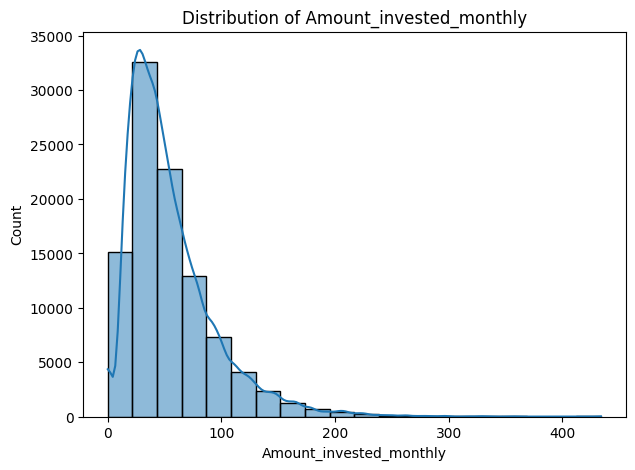

In [23]:
univariant_plot(df, "Amount_invested_monthly")

In [24]:
def cat_univariant_analysis(column:str):
    plt.figure(figsize=(7,5))
    sns.countplot(df[column], legend=False)
    plt.title(f"Count plot for {column}")
    plt.show()

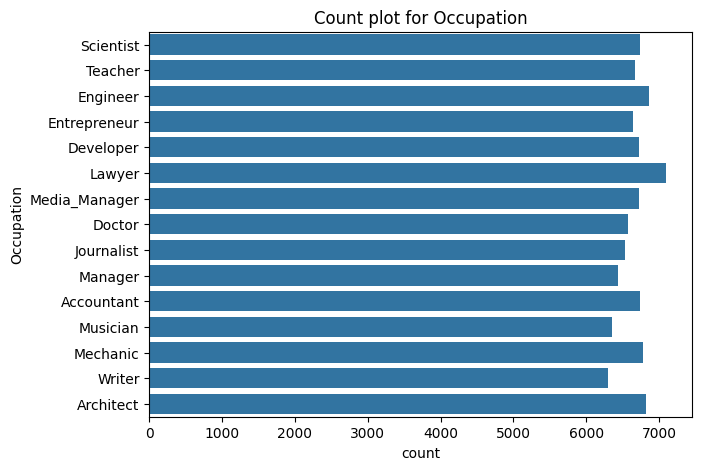

In [25]:
cat_univariant_analysis("Occupation")

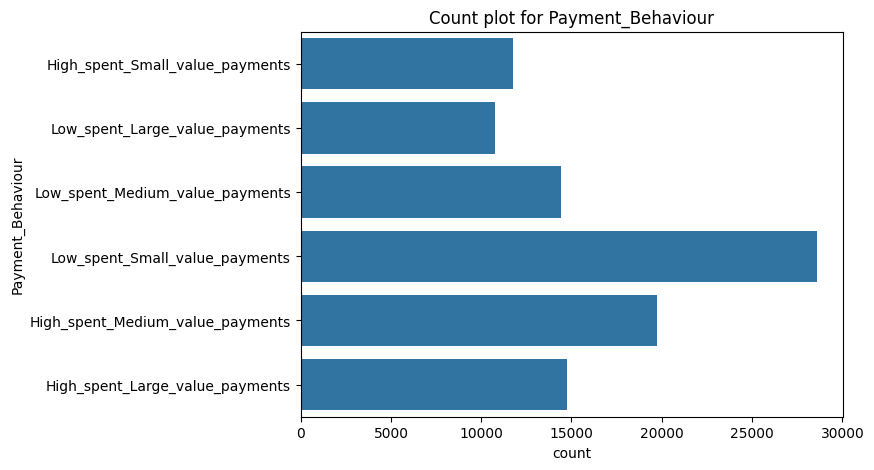

In [26]:
cat_univariant_analysis("Payment_Behaviour")

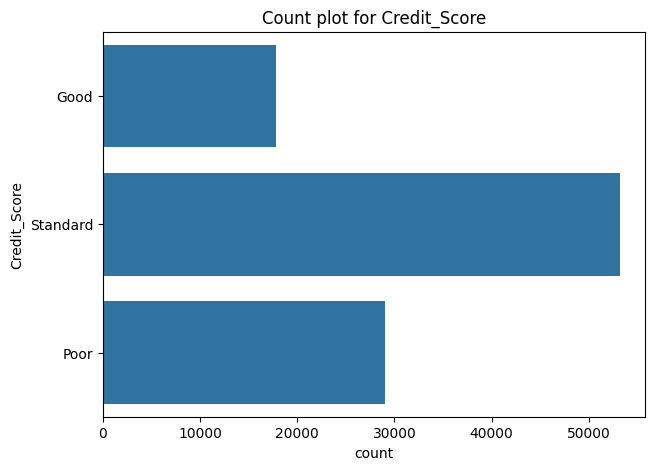

In [27]:
cat_univariant_analysis("Credit_Score")

#### Outlier

In [28]:
# Visualizing the columns has outlier
numerical_columns = df.select_dtypes(include=[np.number]).columns


outlier_summary = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outlier_count
    

outlier_summary = pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["Outlier_Count"])
outlier_summary = outlier_summary.sort_values("Outlier_Count", ascending=False) 
outlier_summary = outlier_summary[outlier_summary["Outlier_Count"] > 0] # Get columns names for those Outlier_Count above 0
outlier_summary

,Outlier_Count
Monthly_Balance,7400
Outstanding_Debt,5272
Total_EMI_per_month,5044
Amount_invested_monthly,4464
Delay_from_due_date,4002
Monthly_Inhand_Salary,2017
Annual_Income,2000
Num_Credit_Inquiries,787
Changed_Credit_Limit,579
Credit_Utilization_Ratio,4


In [29]:
outlier_columns = list(outlier_summary.index)
print(outlier_columns)

['Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Delay_from_due_date', 'Monthly_Inhand_Salary', 'Annual_Income', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio']


In [30]:
len(outlier_columns)

10

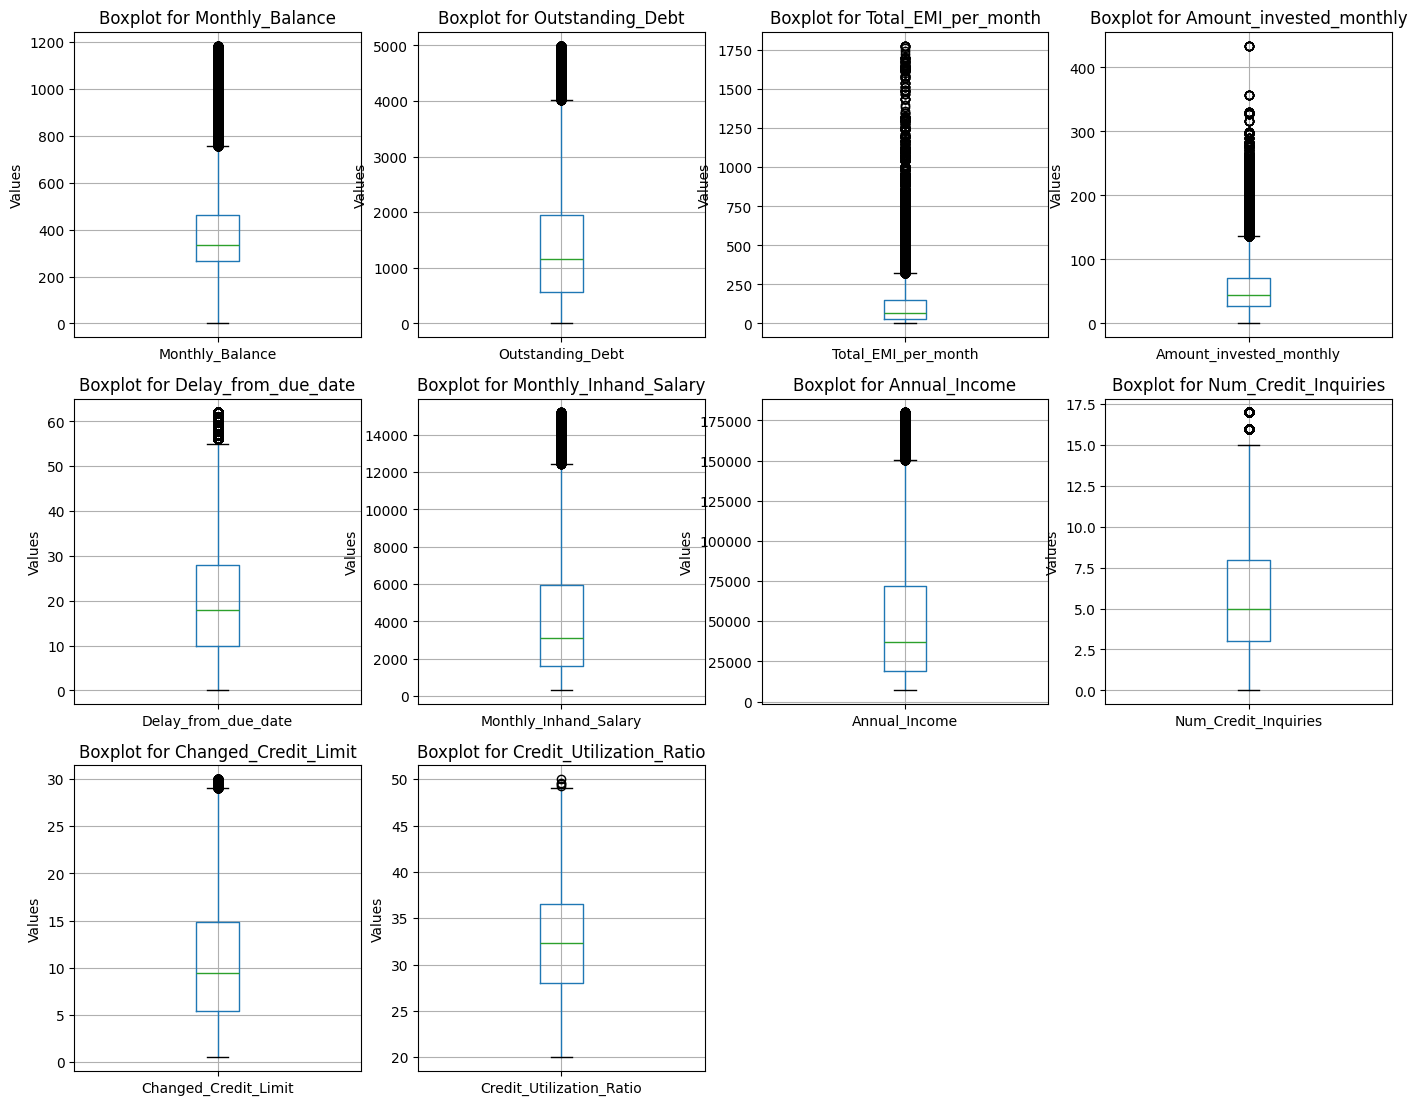

In [31]:
# Outlier visualization
n_cols = len(outlier_columns)
n_rows = (n_cols+2) // 4


fig, axes = plt.subplots(n_rows, 4, figsize=(17, 4.5*n_rows))
axes = axes.flatten()

for i,col in enumerate(outlier_columns):
    df.boxplot(column = col, ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].set_ylabel("Values")
    
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.show()

### Insights

* Numerical columns like 'Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Delay_from_due_date' etc...  are having outliers.

* In Financial datasets we can except some of the outlier behaviour that may contribute to the bad score or used to predict defaulters

#### Bivariant analysis

In [32]:
def bivariant_plot(data,column1, column2):
    sns.boxplot(data,x=column1,y=column2, hue=column1, palette="Set3")
    plt.title(f"{column1} vs {column2}")
    plt.show()

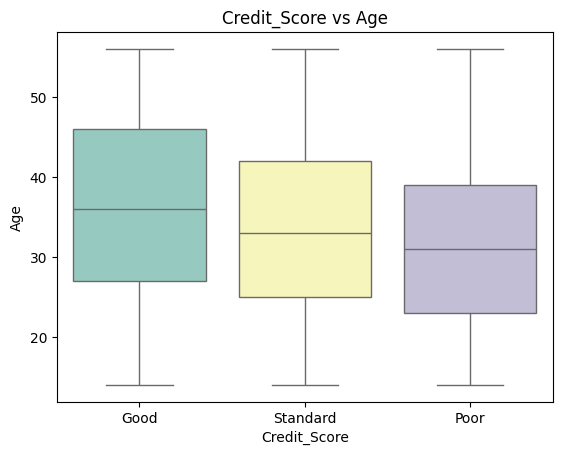

In [33]:
bivariant_plot(df, "Credit_Score", "Age")

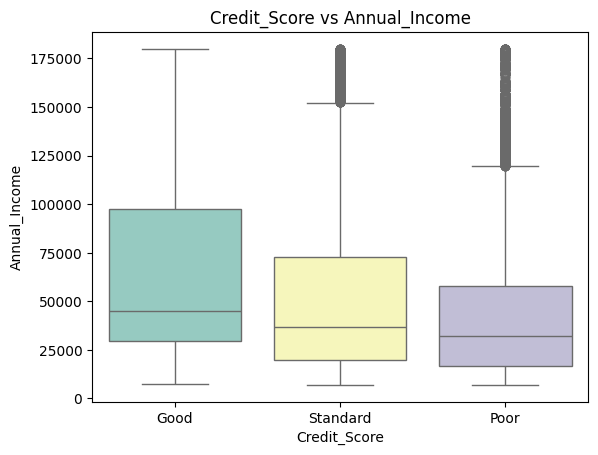

In [34]:
bivariant_plot(df,"Credit_Score","Annual_Income")

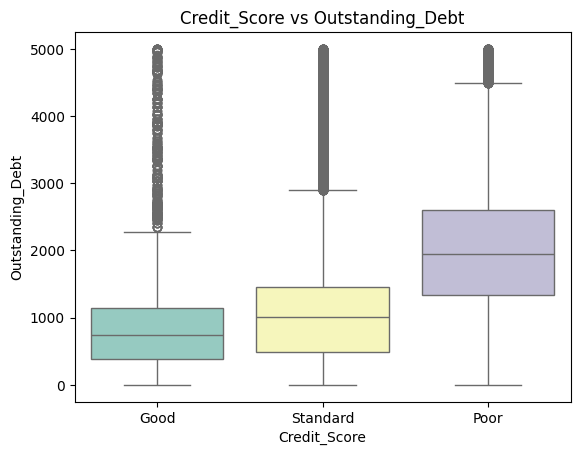

In [35]:
bivariant_plot(df,"Credit_Score","Outstanding_Debt")

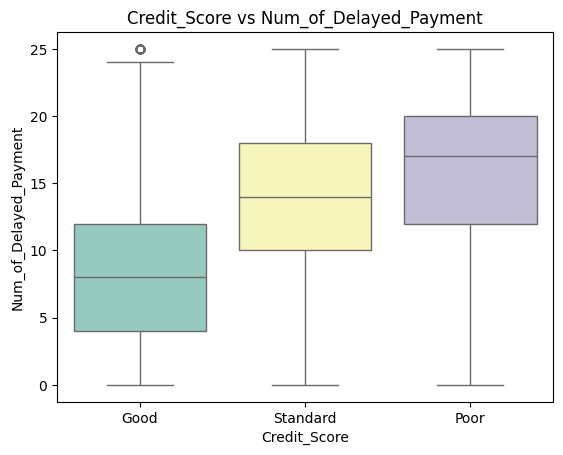

In [36]:
bivariant_plot(df,"Credit_Score","Num_of_Delayed_Payment")

In [37]:
def bivariant_plot_count_plot(data,column1):
    plt.figure(figsize=(16,6))
    sns.countplot(data,x=column1, hue="Credit_Score", palette="viridis")
    plt.title(f"{column1}")
    plt.xticks(rotation=40)
    plt.legend(loc=1)
    plt.show()

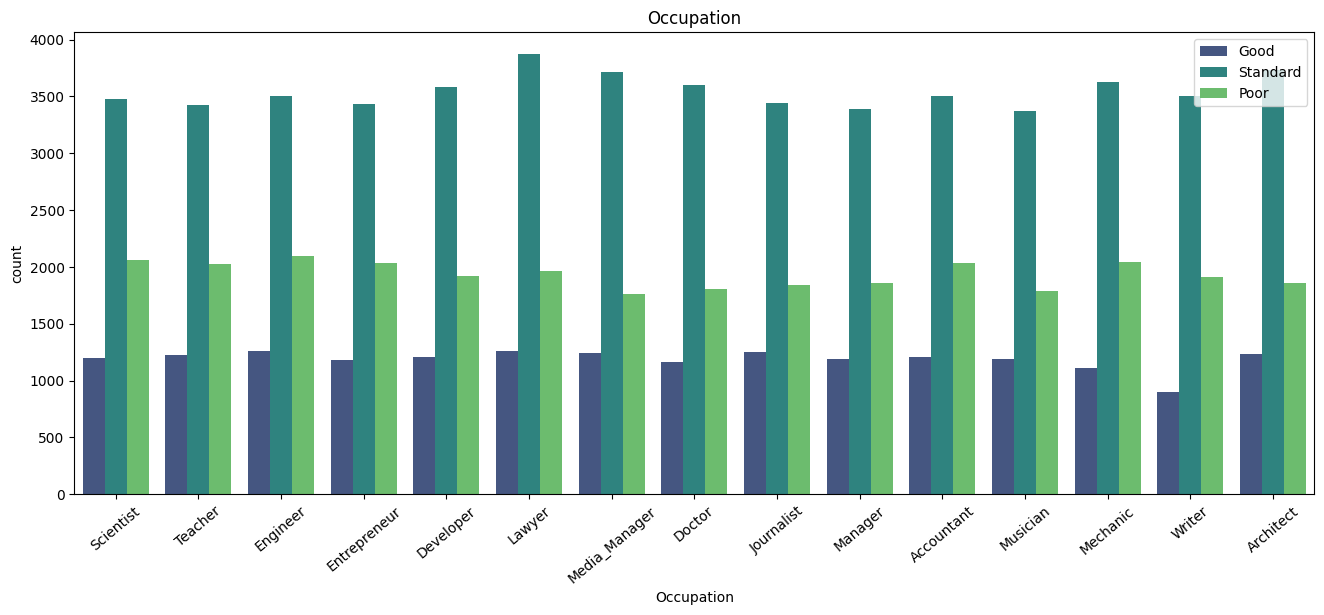

In [38]:
bivariant_plot_count_plot(df, "Occupation")

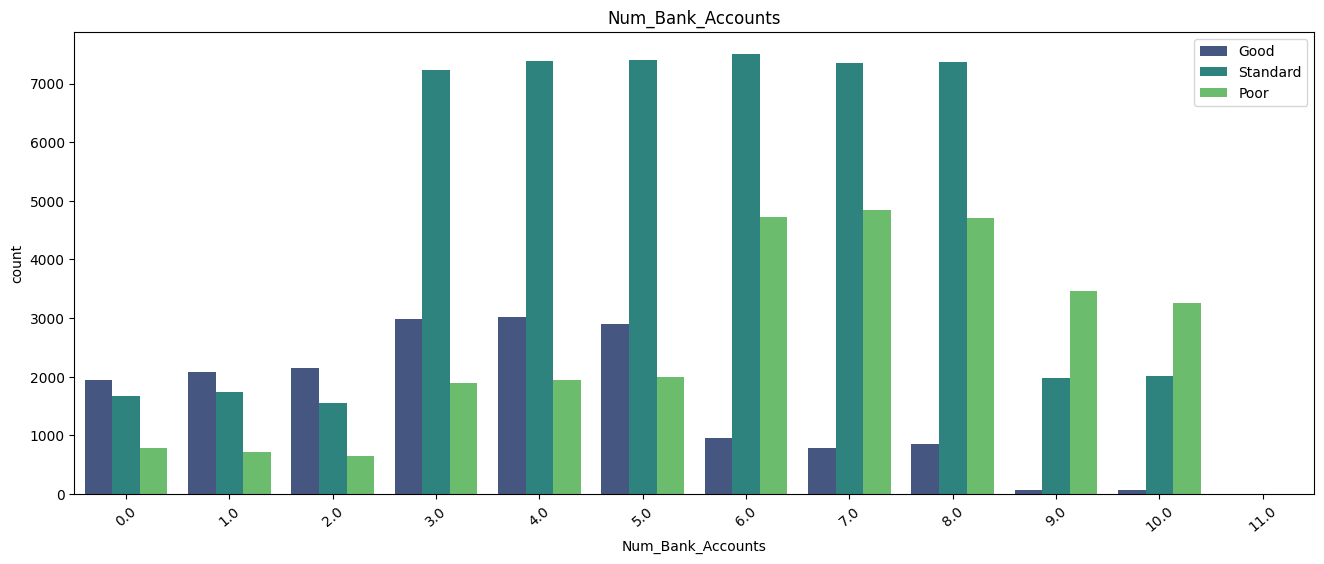

In [39]:
bivariant_plot_count_plot(df, "Num_Bank_Accounts")

#### Multivariant Analysis

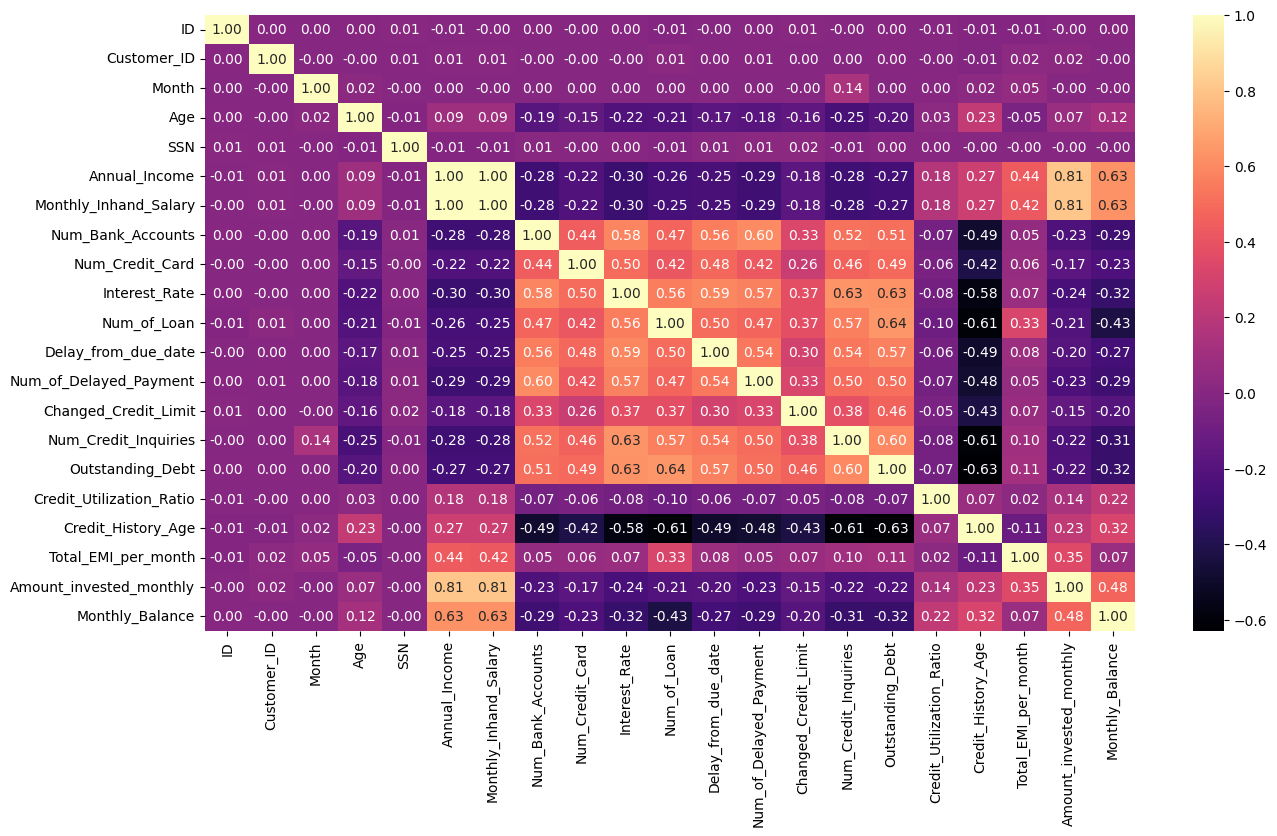

In [40]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="magma", fmt=".2f")
plt.show()

#### Insights

* **Correlation Heatmap:**

    -`Annual Income` and `Monthly inhand salary` are 100% correlated (High Multicollinearity)

    -`Annual Income` and `Amount invested monthly` are 81% correlated

    -`Monthly balance`, `Monthly in inhand salary`and `Annual Income` are hgihly correlated. And many colums are Positively and Negatively correlated

    -`ID`,`Month`,`SSN`,`Customer_ID` are near having near Zero correlations.

* **Issues to address:**

    - Multicollinearity issue has to be addressed while preprocessing

    - Droping the uninformative features for modelling

### Hypothesis Testing (P-value / which tells how confident we can)

Testing some hypothesis for better understanding of customers and to get some insights that can drive business value

1. Hypothesis 5 

    * Null Hypothesis (H0): The mean `Monthly_Inhand_Salary` is the same for customers who paid the `minimum amount` and those who did not.

    * Alternative Hypothesis (Ha): The mean `Monthly_Inhand_Salary` is different between the two groups.

In [41]:
from scipy.stats import ttest_ind

holiday_group = df[df["Payment_of_Min_Amount"]=="Yes"]["Monthly_Inhand_Salary"]

non_holiday_group = df[df["Payment_of_Min_Amount"]=="No"]["Monthly_Inhand_Salary"]

t_sat, p_val = ttest_ind(holiday_group,non_holiday_group)

print(f"T-test monthly salary (Payment min Yes or No): p-value = {p_val:.30f}")

T-test monthly salary (Payment min Yes or No): p-value = 0.000000000000000000000000000000


2. Hypothesis 6 

    * Null Hypothesis (H0): The mean `Num_of_Delayed_Payment` is the same for customers with a `"Poor" credit score` and those with a `"Good" credit score`.

    * Alternative Hypothesis (Ha): The mean `Num_of_Delayed_Payment` is different between the two groups.

In [42]:
low_score = df[df["Credit_Score"] == "Poor"]["Num_of_Delayed_Payment"]
high_score = df[df["Credit_Score"] == "Good"]["Num_of_Delayed_Payment"]

t_sat, p_val = ttest_ind(low_score,high_score)

print(f"T-test delayed payments (Poor vs Good credit): p-value = {p_val:.30f}")

T-test delayed payments (Poor vs Good credit): p-value = 0.000000000000000000000000000000


### Feature Engineering & Data Pre-processing

#### 1. Droping the unnecessary columns

In [43]:
print(list(df.columns))

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [44]:
df_p = df.drop(columns = ["ID","Customer_ID","Name", "SSN"])

In [45]:
print(list(df_p.columns))

print("Shape of the dataset:", df_p.shape)

['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
Shape of the dataset: (100000, 24)


#### 1. Handling Missing Values

In [46]:
# # Handling Missing Values & Missing Value Imputation

df_p.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

#### 2. Categorical Encoding

##### 2.1 Handling single label categotical columns

In [47]:
print("Categorical columns: ",list(object_columns))

Categorical columns:  ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [48]:
cat_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'] # , 'Type_of_Loan' , 'Credit_Score'

oh_encoder = OneHotEncoder(sparse_output=False,drop='first')

In [49]:
one_hot_encoded = oh_encoder.fit_transform(df_p[cat_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=oh_encoder.get_feature_names_out(cat_columns),index=df_p.index)

one_hot_df.shape

(100000, 23)

In [50]:
df_p = pd.concat([df_p, one_hot_df], axis=1)

df_p = df_p.drop(columns=cat_columns, axis=1)

In [51]:
df_p.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,809.98,26.82262,265.0,49.574949,21.46538,312.494089,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,809.98,31.94496,266.0,49.574949,21.46538,284.629162,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


##### 2.2 Handling multi-valued categorical column

In [52]:
# Replacing the "delimiter", "and" and Stip space
df_p["Type_of_Loan"] = df_p["Type_of_Loan"].str.replace("and",",",regex=True)
df_p["Type_of_Loan"] = df_p["Type_of_Loan"].str.replace("\s+"," ",regex=True).str.strip()

In [53]:
# Split into list
df_p["Type_of_Loan"] = df_p["Type_of_Loan"].str.split(",")

# Remove the ducplicates
df_p["Type_of_Loan"] = df_p["Type_of_Loan"].apply(lambda x: list(set([i.strip() for i in x])))

In [54]:
# Applying Multi label binarizer

mlb = MultiLabelBinarizer()
loan_encoded = mlb.fit_transform(df_p["Type_of_Loan"])

# Convert back to dataframe
loan_df = pd.DataFrame(loan_encoded, columns=mlb.classes_)

df_p = pd.concat([df_p, loan_df], axis=1)

In [55]:
# Drop the actual column
df_p = df_p.drop(columns=["Type_of_Loan"], axis=1)

In [56]:
df_p.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Data,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0,1,0,0,0,0,1,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,0,1,0,0,0,0,1,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,1,0,0,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0,1,0,0,0,0,1,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1,0,1,0,0,0,0,1,0


In [57]:
df_p.shape

(100000, 53)

#### 2.4 Categorical encoding for Target column

In [58]:
map_values = {"Poor": 0,
              "Standard": 1,
              "Good":2}

df_p["Credit_Score"] = df_p["Credit_Score"].map(map_values)

### 3. Multicollinearity

In [59]:
# Adding a constant variabel
X = add_constant(df_p)

vif_data = pd.DataFrame()

vif_data["features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [60]:
vif_data[vif_data["VIF"] > 5] 

,features,VIF
0,const,221.585636
3,Annual_Income,318.938082
4,Monthly_Inhand_Salary,310.584490
8,Num_of_Loan,10.547347
34,Credit_Mix_Good,10.228372
35,Credit_Mix_Standard,5.351070


#### Issues to be Addressed

High Multicollinearity on `Annual_Income` and `Monthly_Inhand_Salary` So, dropping one of them is ideal.

In [61]:
df_p = df_p.drop(columns=["Monthly_Inhand_Salary"])

df_p.head()

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Data,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0,1,0,0,0,0,1,0
1,2,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,0,1,0,0,0,0,1,0
2,3,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,1,0,0,0,0,1,0
3,4,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0,1,0,0,0,0,1,0
4,5,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1,0,1,0,0,0,0,1,0


In [63]:
df_p.shape

(100000, 52)

## PCA (Dimensionality Reduction) and Standard scaler

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [65]:
X = df_p.drop(columns="Credit_Score")

y = df_p["Credit_Score"]

# Spilting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Using stratify for imbalance data

### Scree plot

 Scree plot is to facilitate dimensionality reduction by helping researchers decide how many latent variables (factors or components) are necessary to capture the essential structure of the data without losing too much information.

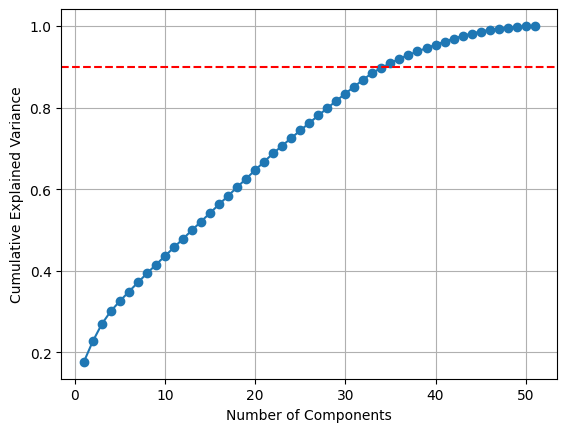

In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA().fit(X_scaled)

plt.plot(range(1, X_scaled.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.9, color='r',linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


For 95% variance, we need around 40 components.

### Applying PCA and StandardScaler

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler",StandardScaler()),  # Scale X_train
    ("pca",PCA(n_components=40))   # Apply PCA
])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [ ]:
# # Lets apply Feature scaling on the training (resampled) data

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled_res = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [70]:
classifiers = {
    "Decision Tree classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest classifier": RandomForestClassifier(random_state=42),
    "Gradient Boost classifier": GradientBoostingClassifier(random_state=42),
    "Ada Boost classifier": AdaBoostClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Gaussian NB": GaussianNB(),
    "K Neighbors classifier": KNeighborsClassifier(),
    "XG Boost classifier": XGBClassifier(random_state=42),
}

In [71]:
metrics = {
    "Model": [],
    
    # Training scores
    "Train Accuracy": [],
    "Train Precision": [],
    "Train Recall": [],
    "Train F1": [],
    
    # Test scores
    "Test Accuracy": [],
    "Test Precision": [],
    "Test Recall": [],
    "Test F1": []
}

In [ ]:
for model_name, classifier in classifiers.items():
    
    # Fitting the models
    classifier.fit(X_train_transformed, y_train)
    
    # Train Prediction & metrics
    y_train_pred = classifier.predict(X_train_transformed)

    # Add the values to the metrics
    metrics["Model"].append(model_name)
    metrics["Train Accuracy"].append(accuracy_score(y_train, y_train_pred))
    metrics["Train Precision"].append(precision_score(y_train, y_train_pred, average="macro"))  # macro --> Each class is given equal importance, regardless of how many samples it has.
    metrics["Train Recall"].append(recall_score(y_train, y_train_pred, average="macro"))
    metrics["Train F1"].append(f1_score(y_train, y_train_pred, average="macro"))
    
    # Test Prediction & metrics
    y_test_pred = classifier.predict(X_test_transformed)

    # Add the values to the metrics
    metrics["Test Accuracy"].append(accuracy_score(y_test, y_test_pred))
    metrics["Test Precision"].append(precision_score(y_test, y_test_pred, average="macro"))
    metrics["Test Recall"].append(recall_score(y_test, y_test_pred, average="macro"))
    metrics["Test F1"].append(f1_score(y_test, y_test_pred, average="macro"))

In [ ]:
metrics_df = pd.DataFrame(metrics)

In [ ]:
metrics_df

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Decision Tree classifier,1.000000,1.000000,1.000000,1.000000,0.75295,0.740372,0.738014,0.739172
1,Random Forest classifier,0.999988,0.999986,0.999992,0.999989,0.83610,0.826975,0.834146,0.830267
2,Gradient Boost classifier,0.723513,0.702780,0.712967,0.704940,0.72255,0.702213,0.712070,0.704252
3,Ada Boost classifier,0.631525,0.605539,0.594366,0.599431,0.63280,0.609544,0.594552,0.601189
4,Support Vector Classifier,0.776800,0.757246,0.768035,0.761429,0.74325,0.722625,0.732218,0.725992
5,Gaussian NB,0.625637,0.631718,0.691675,0.624073,0.63205,0.637241,0.697856,0.630390
6,K Neighbors classifier,0.842688,0.835170,0.829851,0.831814,0.76120,0.747428,0.737376,0.741702
7,XG Boost classifier,0.841437,0.829632,0.839739,0.834469,0.78685,0.771784,0.779020,0.775214


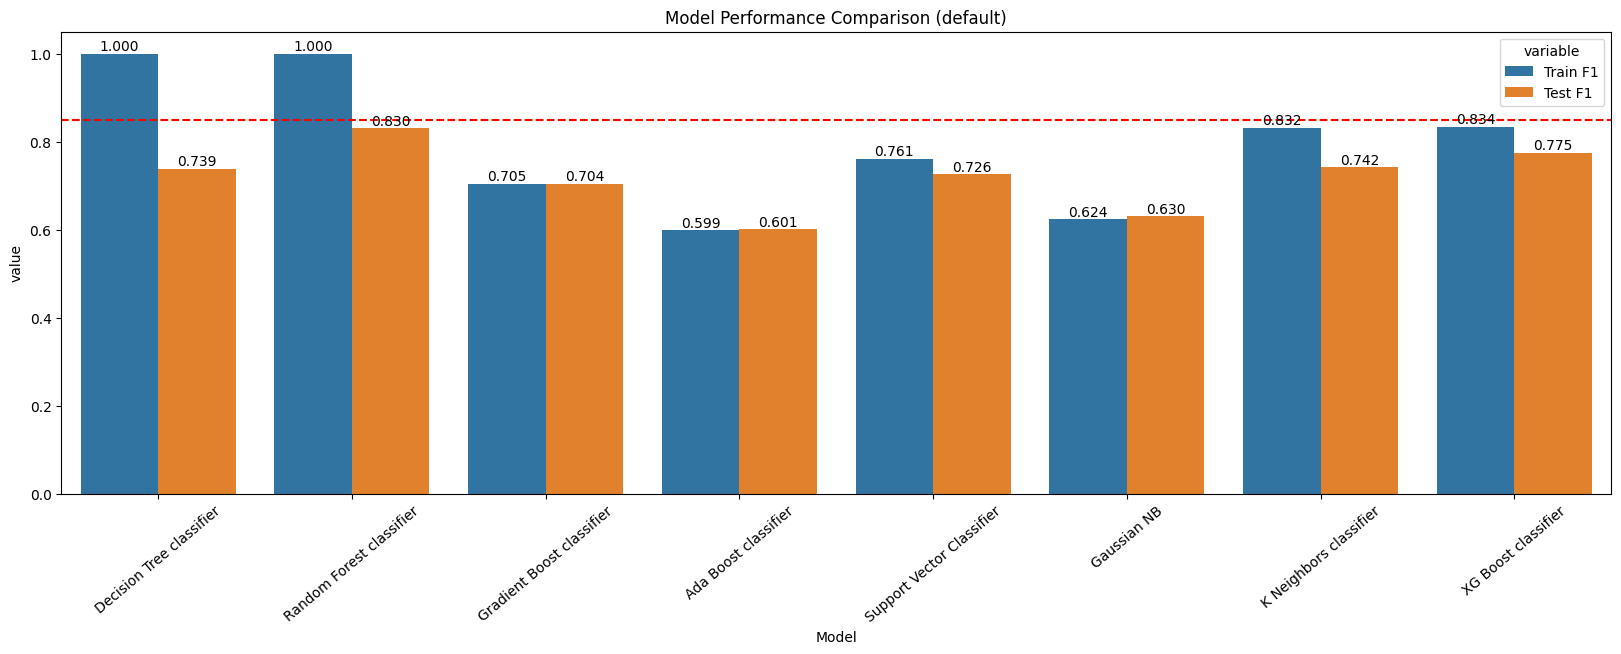

In [ ]:
meted_f1_df = pd.melt(metrics_df, id_vars=["Model"], value_vars=["Train F1", "Test F1"])

plt.figure(figsize=(20,6))
ax = sns.barplot(meted_f1_df, x="Model", y="value", hue="variable", legend="auto")
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f')  
ax.bar_label(ax.containers[1], fontsize=10, fmt='%.3f')
plt.axhline(y=0.85, color="red", linestyle="--", linewidth=1.5, label="Target F1")
plt.title("Model Performance Comparison (default)")
plt.xticks(rotation=40)
plt.show()

Conclusion:

XG Boost classifier	 generalized more compared with other models

Experiments To improve the accuracy

* PCA - Dimentionatinality reduction
* Hyper parameter tunning
* Testing by Removing other high multicollinearity
